In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [26]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
ohe = pd.get_dummies(data.drop(columns=['age','bmi','children','charges']), drop_first=True) 

x = data.drop(columns='charges')
y = data['charges']

ohe_x = pd.concat([x, ohe], axis=1)
ohe_x = ohe_x.drop(columns=['sex','smoker','region'])
ohe_x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(ohe_x, y, test_size = .2, random_state=3)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((1070, 8), (1070,), (268, 8), (268,))

In [5]:
model = DecisionTreeRegressor(max_depth=7).fit(xtrain, ytrain) 

- max_depth is one of the hyper parameter 
- max_depth has to be defined otherwise tree will be very large & complicated since it tries to split every node which leads to  overfitting
- In above case max_depth is assumed to be 7


In [27]:
ypred_test = model.predict(xtest)

print('RMSE: %.2f' % np.sqrt(mean_squared_error(ytest, ypred_test)))
print('R2_score: %.2f' % (r2_score(ytest, ypred_test)))


RMSE: 5107.70
R2_score: 0.83


# Ways to find hyper-parameter (max_depth) values
# **Grid Search CV**

#### Tuning single hyper parameter

In [28]:
params = {'max_depth':list(range(2,20))} # specifying the range for max_depths to create multiple trees
params

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

In [29]:
dtr = DecisionTreeRegressor()

# scoring of 'r2' refers to metrics.r2_score
gs = GridSearchCV(estimator=dtr, param_grid=params, scoring='r2', cv=5).fit(xtrain, ytrain)
##### Manual
gs.best_params_, gs.best_score_

({'max_depth': 4}, 0.8442256526379934)

In [30]:
# If we want to know results of R2 scores for other max_depths use -> cv_results_
df_cv_results = pd.DataFrame(gs.cv_results_)
df_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002756,0.000338,0.001801,0.000166,2,{'max_depth': 2},0.858603,0.821586,0.799544,0.832497,0.773684,0.817183,0.028889,5
1,0.002688,0.000156,0.001725,0.000163,3,{'max_depth': 3},0.872395,0.840703,0.829108,0.860875,0.813027,0.843222,0.021354,2
2,0.002917,0.000228,0.001667,0.000060,4,{'max_depth': 4},0.873399,0.847134,0.823459,0.863403,0.813734,0.844226,0.022752,1
3,0.002928,0.000081,0.001629,0.000012,5,{'max_depth': 5},0.881857,0.840070,0.821493,0.840154,0.812334,0.839181,0.023902,3
4,0.003093,0.000013,0.001635,0.000004,6,{'max_depth': 6},0.856871,0.836761,0.812115,0.824742,0.801584,0.826415,0.019279,4
5,0.003282,0.000004,0.001639,0.000004,7,{'max_depth': 7},0.806212,0.834337,0.791772,0.783850,0.767643,0.796763,0.022542,6
6,0.003501,0.000011,0.001634,0.000004,8,{'max_depth': 8},0.791732,0.810743,0.760965,0.773473,0.741875,0.775758,0.023880,7
7,0.003688,0.000035,0.001674,0.000120,9,{'max_depth': 9},0.779696,0.791453,0.746730,0.716878,0.719042,0.750760,0.030540,8
8,0.003865,0.000019,0.001602,0.000004,10,{'max_depth': 10},0.766255,0.782336,0.735608,0.710102,0.682855,0.735431,0.036211,9
9,0.004056,0.000024,0.001631,0.000040,11,{'max_depth': 11},0.738168,0.753959,0.709053,0.676733,0.653344,0.706251,0.037344,10


In [31]:
df_cv_results.iloc[2]

mean_fit_time                0.002917
std_fit_time                 0.000228
mean_score_time              0.001667
std_score_time                0.00006
param_max_depth                     4
params               {'max_depth': 4}
split0_test_score            0.873399
split1_test_score            0.847134
split2_test_score            0.823459
split3_test_score            0.863403
split4_test_score            0.813734
mean_test_score              0.844226
std_test_score               0.022752
rank_test_score                     1
Name: 2, dtype: object

Above result has a rank of 1

####  By default we get only test scores but if we want training scores as well we need to add additional parameter 'return_train_score=True' 

In [11]:
gs = GridSearchCV(estimator=dtr, param_grid=params, scoring='r2', cv=5, return_train_score=True).fit(xtrain, ytrain)
gs.best_params_, gs.best_score_

({'max_depth': 4}, 0.8442256526379934)

In [12]:
df_cv_results = pd.DataFrame(gs.cv_results_)
df_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002302,0.000310,0.001764,0.000583,2,{'max_depth': 2},0.858603,0.821586,0.799544,0.832497,...,0.817183,0.028889,5,0.819417,0.827717,0.831257,0.824030,0.836846,0.827853,0.005971
1,0.002026,0.000146,0.001215,0.000028,3,{'max_depth': 3},0.872395,0.840703,0.829108,0.860875,...,0.843222,0.021354,2,0.850229,0.857754,0.860768,0.852336,0.863762,0.856970,0.005061
2,0.001896,0.000179,0.001064,0.000051,4,{'max_depth': 4},0.873399,0.847134,0.823459,0.863403,...,0.844226,0.022752,1,0.864101,0.869582,0.874635,0.869683,0.876017,0.870804,0.004231
3,0.002064,0.000161,0.001182,0.000102,5,{'max_depth': 5},0.881857,0.840070,0.821493,0.840154,...,0.839181,0.023902,3,0.876684,0.886134,0.889776,0.883865,0.887722,0.884836,0.004513
4,0.002207,0.000328,0.001123,0.000128,6,{'max_depth': 6},0.856937,0.836761,0.811208,0.819717,...,0.828749,0.016375,4,0.894145,0.901555,0.907257,0.898799,0.903020,0.900955,0.004367


# Plot mean train and test scores

In [13]:
mean_train_scores = df_cv_results['mean_train_score']
mean_test_scores   = df_cv_results['mean_test_score']
max_depths = df_cv_results['param_max_depth']

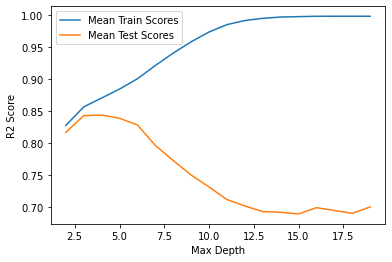

In [14]:
plt.plot(max_depths, mean_train_scores, label='Mean Train Scores')
plt.plot(max_depths, mean_test_scores, label ='Mean Test Scores')
plt.ylabel('R2 Score')
plt.xlabel('Max Depth')
plt.legend()

* Above chart implies how the train and test scores varies upon changes in max_depths
* max_depth below 4 could underfit 
* max_depth above 4 could overfit

## Predicting best r2 score using test with best estimator

In [15]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=4)

In [16]:
ypred_test = gs.best_estimator_.predict(xtest)
print('R2 Score : %.2f' % r2_score(ytest, ypred_test))

R2 Score : 0.87


## Tuning multiple hyper parameters
* Performing cross multiplication

In [19]:
params = {'max_depth':list(range(2,7)), 'min_samples_split':[5,10,15]}

for x in params['max_depth']:
    for y in params['min_samples_split']:
        print(x, y)
    print('-'*100)

2 5
2 10
2 15
----------------------------------------------------------------------------------------------------
3 5
3 10
3 15
----------------------------------------------------------------------------------------------------
4 5
4 10
4 15
----------------------------------------------------------------------------------------------------
5 5
5 10
5 15
----------------------------------------------------------------------------------------------------
6 5
6 10
6 15
----------------------------------------------------------------------------------------------------


In [20]:
dtr = DecisionTreeRegressor()

gs = GridSearchCV(estimator=dtr, param_grid=params, scoring='r2', cv=5).fit(xtrain, ytrain)
##### Manual
gs.best_params_, gs.best_score_

({'max_depth': 4, 'min_samples_split': 5}, 0.8442256526379934)

In [21]:
# If we want to know results of R2 scores for other max_depths use -> cv_results_
df_cv_results = pd.DataFrame(gs.cv_results_)
df_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002412,0.000684,0.001606,3.330883e-04,2,5,"{'max_depth': 2, 'min_samples_split': 5}",0.858603,0.821586,0.799544,0.832497,0.773684,0.817183,0.028889,13
1,0.001861,0.000233,0.001239,2.105331e-04,2,10,"{'max_depth': 2, 'min_samples_split': 10}",0.858603,0.821586,0.799544,0.832497,0.773684,0.817183,0.028889,13
2,0.001587,0.000162,0.000980,3.712691e-05,2,15,"{'max_depth': 2, 'min_samples_split': 15}",0.858603,0.821586,0.799544,0.832497,0.773684,0.817183,0.028889,13
3,0.001567,0.000100,0.000983,2.986554e-05,3,5,"{'max_depth': 3, 'min_samples_split': 5}",0.872395,0.840703,0.829108,0.860875,0.813027,0.843222,0.021354,4
4,0.001533,0.000034,0.000996,4.137353e-05,3,10,"{'max_depth': 3, 'min_samples_split': 10}",0.872395,0.840703,0.829108,0.860875,0.813027,0.843222,0.021354,4
5,0.001636,0.000107,0.000986,4.588814e-05,3,15,"{'max_depth': 3, 'min_samples_split': 15}",0.872395,0.840703,0.829108,0.860875,0.813027,0.843222,0.021354,4
6,0.001776,0.000146,0.001255,5.512723e-04,4,5,"{'max_depth': 4, 'min_samples_split': 5}",0.873399,0.847134,0.823459,0.863403,0.813734,0.844226,0.022752,1
7,0.001725,0.000003,0.001028,3.188041e-06,4,10,"{'max_depth': 4, 'min_samples_split': 10}",0.873399,0.847134,0.823459,0.863403,0.813734,0.844226,0.022752,1
8,0.001724,0.000009,0.001030,4.106340e-06,4,15,"{'max_depth': 4, 'min_samples_split': 15}",0.873399,0.847134,0.823459,0.863403,0.813734,0.844226,0.022752,1
9,0.001843,0.000048,0.001021,4.098026e-06,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.882036,0.840070,0.821493,0.840154,0.812334,0.839217,0.023966,8


* Problem with GridSearchCV is that the number of combinations will increase with multiple hyperparameters like above
* With multiple hyperparameters through GridSearchCV, whole process will take lot of time with large data 
* Due to such probs we use RandomizedSearchCV

**RandomizedSearchCV** : Instead of making combinations with all the hyperparameters, it will select few of the combinations and does hyperparameter tuning.
* Due to which number of combinations are less and will yeild optimal results faster

In [23]:
params1 = {'max_depth':list(range(2,50)), 'min_samples_split':[5,10,15,20,25,30]}

dtr = DecisionTreeRegressor()

rs = RandomizedSearchCV(estimator=dtr, param_distributions=params1, scoring='r2', cv=5).fit(xtrain, ytrain)
##### Manual
rs.best_params_, rs.best_score_

({'min_samples_split': 30, 'max_depth': 25}, 0.8233225427297516)

- Above result will be close to original optimal values due to randomized search
- But sometimes results won't be close to original optimal values

In [24]:
# If we want to know results of R2 scores for other max_depths use -> cv_results_
df_cv_results = pd.DataFrame(rs.cv_results_)
df_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003359,0.000817,0.001439,0.000267,5,17,"{'min_samples_split': 5, 'max_depth': 17}",0.750829,0.762460,0.728300,0.767614,0.710285,0.743897,0.021579,10
1,0.002457,0.000174,0.001284,0.000245,10,23,"{'min_samples_split': 10, 'max_depth': 23}",0.807436,0.791024,0.742471,0.784307,0.784087,0.781865,0.021450,7
2,0.002001,0.000091,0.001010,0.000037,30,25,"{'min_samples_split': 30, 'max_depth': 25}",0.857456,0.841360,0.797367,0.828814,0.791616,0.823323,0.025297,1
3,0.002027,0.000017,0.000980,0.000002,20,11,"{'min_samples_split': 20, 'max_depth': 11}",0.837850,0.833769,0.786858,0.811917,0.785415,0.811162,0.022259,5
4,0.002398,0.000029,0.000986,0.000003,5,39,"{'min_samples_split': 5, 'max_depth': 39}",0.738425,0.762499,0.728504,0.763741,0.728254,0.744285,0.015815,9
5,0.001949,0.000026,0.000979,0.000003,25,18,"{'min_samples_split': 25, 'max_depth': 18}",0.843659,0.839918,0.789493,0.821789,0.800095,0.818991,0.021361,2
6,0.001950,0.000026,0.000973,0.000009,25,13,"{'min_samples_split': 25, 'max_depth': 13}",0.843659,0.839918,0.789493,0.821789,0.800095,0.818991,0.021361,2
7,0.002226,0.000388,0.000997,0.000040,15,24,"{'min_samples_split': 15, 'max_depth': 24}",0.836564,0.824082,0.774789,0.797103,0.773329,0.801173,0.025555,6
8,0.002384,0.000060,0.000997,0.000029,5,35,"{'min_samples_split': 5, 'max_depth': 35}",0.738516,0.766892,0.728327,0.767420,0.727912,0.745813,0.017836,8
9,0.001903,0.000023,0.000961,0.000004,25,17,"{'min_samples_split': 25, 'max_depth': 17}",0.843659,0.839918,0.789493,0.821789,0.800095,0.818991,0.021361,2


In [25]:
df_cv_results[['params']]

,params
0,"{'min_samples_split': 5, 'max_depth': 17}"
1,"{'min_samples_split': 10, 'max_depth': 23}"
2,"{'min_samples_split': 30, 'max_depth': 25}"
3,"{'min_samples_split': 20, 'max_depth': 11}"
4,"{'min_samples_split': 5, 'max_depth': 39}"
5,"{'min_samples_split': 25, 'max_depth': 18}"
6,"{'min_samples_split': 25, 'max_depth': 13}"
7,"{'min_samples_split': 15, 'max_depth': 24}"
8,"{'min_samples_split': 5, 'max_depth': 35}"
9,"{'min_samples_split': 25, 'max_depth': 17}"


# * Note :- 1st try out RandomizedSearchCV to know the vicinity of combinations and then try out GridSearchCV to know the actual optimal values 